In [1]:
# Connect colab with drive 
from google.colab import drive 
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
# Unzip quietly the folder
!unzip -q /content/gdrive/MyDrive/CatsDogs.zip 

In [3]:
# Import necessary libraries 
import tensorflow as tf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D,Flatten, Dropout 
from tensorflow.keras import layers

In [4]:
# Delete from the folder the corrupted images
import os 
for folder_path in ["/content/CatsDogs/Cats", "/content/CatsDogs/Dogs"]:
  for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    try:
      obj = open(file_path, "rb")
      is_jfif = tf.compat.as_bytes("JFIF") in obj.peek(10)
    finally:
      obj.close()
    if is_jfif == False:
      os.remove(file_path)
 

In [5]:
print("Cats photos after remotion: " +str(len(os.listdir('/content/CatsDogs/Cats'))))
print("Dogs photos after remotion: " +str(len(os.listdir('/content/CatsDogs/Dogs'))))

Cats photos after remotion: 11741
Dogs photos after remotion: 11669


In [6]:
# Assign hyperparameters values
INPUT_SHAPE = (128,128) #image size 
BATCH_SIZE = 32

In [7]:
# Create a dataframe with uncorrupted cats and dogs images 
df = pd.DataFrame(columns=["Path", "Class"])
dirs = ['/content/CatsDogs/Cats', '/content/CatsDogs/Dogs']
for dir in dirs:
  paths= os.listdir(dir)
  class_name=dir.split("/")[-1]
  df_temp = pd.DataFrame({"Path": paths, "Class": class_name})
  df_temp["Path"] = dir + "/" + df_temp["Path"].astype(str)
  df = pd.concat([df,df_temp])
  
df.sort_values(by="Path", inplace=True, ignore_index=True)

In [8]:
shuffled = df.sample(frac=1,random_state=1)
shuffled.tail()

,Path,Class
10955,/content/CatsDogs/Cats/9244.jpg,Cats
17289,/content/CatsDogs/Dogs/4080.jpg,Dogs
5192,/content/CatsDogs/Cats/373.jpg,Cats
12172,/content/CatsDogs/Dogs/10413.jpg,Dogs
235,/content/CatsDogs/Cats/10221.jpg,Cats


In [9]:
# Split the dataframe into training, validation and test set
rowsplice = int(0.8*len(shuffled))
df_train_valid = shuffled.iloc[:rowsplice]
df_test = shuffled.iloc[rowsplice:]

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
datagenA = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

In [12]:
datagenB= ImageDataGenerator( rescale= 1.0/255)

In [13]:
training_ds= datagenA.flow_from_dataframe(dataframe=df_train_valid,
                                           directory="/content/CatsDogs",
                                           x_col ='Path',
                                           y_col='Class',
                                           target_size=(128,128),
                                           class_mode='binary',
                                           subset='training',
                                           seed=10)

Found 14983 validated image filenames belonging to 2 classes.


In [14]:
validation_ds= datagenA.flow_from_dataframe(dataframe=df_train_valid,
                                             directory="/content/CatsDogs",
                                             x_col ='Path',
                                             y_col='Class',
                                             target_size=(128,128),
                                             class_mode='binary',
                                             subset='validation',
                                             seed=10)

Found 3745 validated image filenames belonging to 2 classes.


In [15]:
test_ds= datagenB.flow_from_dataframe(dataframe=df_test,
                                             directory="/content/CatsDogs",
                                             x_col ='Path',
                                             y_col='Class',
                                             target_size=(128,128),
                                             class_mode='binary',
                                             shuffle=False,
                                             seed=10)

Found 4682 validated image filenames belonging to 2 classes.


In [ ]:
# MODELLO 5 32-64-128-128

model_5=Sequential()

model_5.add(Conv2D(filters=32, kernel_size=(3,3),input_shape = (128,128,3)))
model_5.add(Activation(activation="relu"))
model_5.add(MaxPooling2D(pool_size=(2,2)))
model_5.add(Dropout(0.2))

model_5.add(Conv2D(filters=64, kernel_size=(3,3)))
model_5.add(Activation(activation="relu"))
model_5.add(MaxPooling2D(pool_size=(2,2))) 
model_5.add(Dropout(0.2))

model_5.add(Conv2D(filters=128, kernel_size=(3,3)))
model_5.add(Activation(activation="relu"))
model_5.add(MaxPooling2D(pool_size=(2,2))) 
model_5.add(Dropout(0.2))

model_5.add(Conv2D(filters=128, kernel_size=(3,3)))
model_5.add(Activation(activation="relu"))
model_5.add(MaxPooling2D(pool_size=(2,2))) 
model_5.add(Dropout(0.2))

model_5.add(Flatten())
model_5.add(Dense(64)) 
model_5.add(Activation("relu"))
model_5.add(Dropout(0.5))

model_5.add(Dense(1))
model_5.add(Activation("sigmoid"))

In [ ]:
model_5.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics= ["accuracy"])

model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 activation_24 (Activation)  (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 activation_25 (Activation)  (None, 61, 61, 64)        0         
                                                      

In [ ]:
mod_5 = model_5.fit(training_ds,epochs=50,validation_data = validation_ds)

Epoch 1/50
469/469 [==============================] - 77s 160ms/step - loss: 0.6725 - accuracy: 0.5639 - val_loss: 0.6386 - val_accuracy: 0.6449
Epoch 2/50
469/469 [==============================] - 65s 139ms/step - loss: 0.6221 - accuracy: 0.6478 - val_loss: 0.6102 - val_accuracy: 0.6545
Epoch 3/50
469/469 [==============================] - 66s 142ms/step - loss: 0.5529 - accuracy: 0.7129 - val_loss: 0.4945 - val_accuracy: 0.7615
Epoch 4/50
469/469 [==============================] - 67s 142ms/step - loss: 0.4944 - accuracy: 0.7617 - val_loss: 0.4560 - val_accuracy: 0.7853
Epoch 5/50
469/469 [==============================] - 76s 161ms/step - loss: 0.4393 - accuracy: 0.7980 - val_loss: 0.4301 - val_accuracy: 0.8080
Epoch 6/50
469/469 [==============================] - 67s 144ms/step - loss: 0.4036 - accuracy: 0.8228 - val_loss: 0.3608 - val_accuracy: 0.8417
Epoch 7/50
469/469 [==============================] - 68s 144ms/step - loss: 0.3630 - accuracy: 0.8432 - val_loss: 0.3303 - val_ac

Text(0.5, 1.0, 'Training and Validation loss')

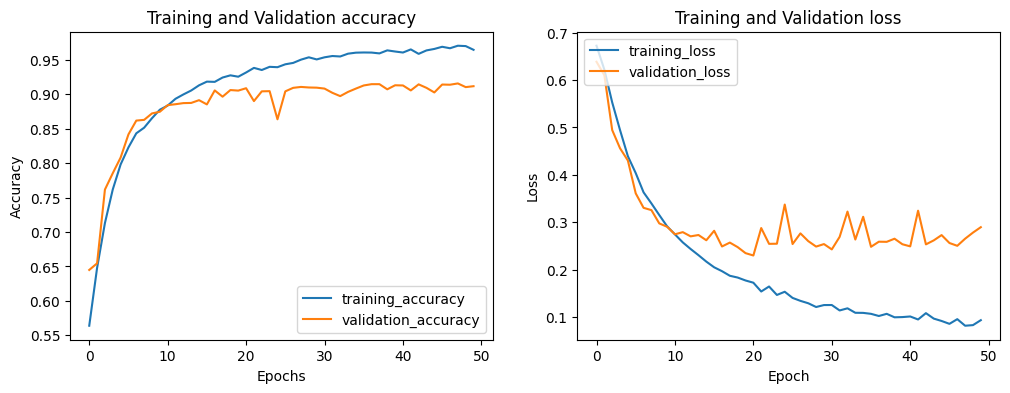

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(mod_5.history['accuracy'], label= 'training_accuracy')
plt.plot(mod_5.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(mod_5.history['loss'], label='training_loss')
plt.plot(mod_5.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation loss')

In [ ]:
model_5.evaluate(test_ds)

147/147 [==============================] - 17s 114ms/step - loss: 0.2600 - accuracy: 0.9124


[0.2599997818470001, 0.9124305844306946]

In [16]:
# MODELLO 6 32-64-128-256
model_6=Sequential()

model_6.add(Conv2D(filters=32, kernel_size=(3,3),input_shape = (128,128,3)))
model_6.add(Activation(activation="relu"))
model_6.add(MaxPooling2D(pool_size=(2,2)))
model_6.add(Dropout(0.2))

model_6.add(Conv2D(filters=64, kernel_size=(3,3)))
model_6.add(Activation(activation="relu"))
model_6.add(MaxPooling2D(pool_size=(2,2))) 
model_6.add(Dropout(0.2))

model_6.add(Conv2D(filters=128, kernel_size=(3,3)))
model_6.add(Activation(activation="relu"))
model_6.add(MaxPooling2D(pool_size=(2,2))) 
model_6.add(Dropout(0.2))

model_6.add(Conv2D(filters=256, kernel_size=(3,3)))
model_6.add(Activation(activation="relu"))
model_6.add(MaxPooling2D(pool_size=(2,2))) 
model_6.add(Dropout(0.2))

model_6.add(Flatten())
model_6.add(Dense(64)) 
model_6.add(Activation("relu"))
model_6.add(Dropout(0.5))

model_6.add(Dense(1))
model_6.add(Activation("sigmoid"))


In [17]:
model_6.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics= ["accuracy"])

model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 activation (Activation)     (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 61, 61, 64)        0         
                                                        

In [ ]:
mod_6 = model_6.fit(training_ds,epochs=50,validation_data = validation_ds)

Epoch 1/50
469/469 [==============================] - 90s 159ms/step - loss: 0.6615 - accuracy: 0.5880 - val_loss: 0.6405 - val_accuracy: 0.6323
Epoch 2/50
469/469 [==============================] - 65s 139ms/step - loss: 0.5899 - accuracy: 0.6859 - val_loss: 0.5194 - val_accuracy: 0.7364
Epoch 3/50
469/469 [==============================] - 64s 137ms/step - loss: 0.5199 - accuracy: 0.7392 - val_loss: 0.4610 - val_accuracy: 0.7856
Epoch 4/50
469/469 [==============================] - 65s 140ms/step - loss: 0.4605 - accuracy: 0.7825 - val_loss: 0.4340 - val_accuracy: 0.7973
Epoch 5/50
469/469 [==============================] - 73s 156ms/step - loss: 0.4069 - accuracy: 0.8171 - val_loss: 0.3729 - val_accuracy: 0.8377
Epoch 6/50
469/469 [==============================] - 66s 140ms/step - loss: 0.3733 - accuracy: 0.8343 - val_loss: 0.3644 - val_accuracy: 0.8390
Epoch 7/50
469/469 [==============================] - 62s 132ms/step - loss: 0.3366 - accuracy: 0.8534 - val_loss: 0.3206 - val_ac

Text(0.5, 1.0, 'Training and Validation loss')

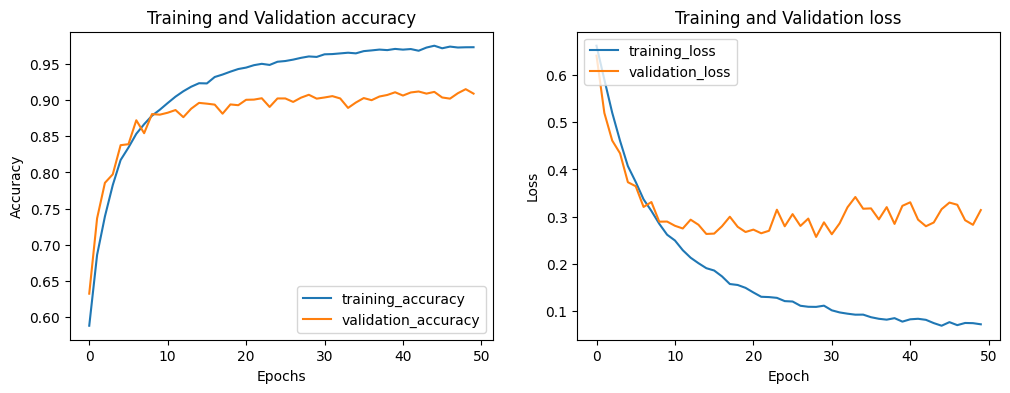

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(mod_6.history['accuracy'], label= 'training_accuracy')
plt.plot(mod_6.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(mod_6.history['loss'], label='training_loss')
plt.plot(mod_6.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation loss')

In [ ]:
model_6.evaluate(test_ds)

147/147 [==============================] - 16s 110ms/step - loss: 0.2820 - accuracy: 0.9165


[0.28198885917663574, 0.9164887070655823]

In [ ]:
from tensorflow.keras.layers import Input, RandomFlip, RandomRotation

In [ ]:
#Modello 7 32-64-128-128 W/ Drop + DATA AUGMENTATION
model_7=Sequential()

model_7.add(Input((128,128,3)))
model_7.add(RandomFlip("horizontal"))
model_7.add(RandomRotation(0.2))

model_7.add(Conv2D(filters=32, kernel_size=(3,3)))
model_7.add(Activation(activation="relu"))
model_7.add(MaxPooling2D(pool_size=(2,2)))
model_7.add(Dropout(0.2))

model_7.add(Conv2D(filters=64, kernel_size=(3,3)))
model_7.add(Activation(activation="relu"))
model_7.add(MaxPooling2D(pool_size=(2,2))) 
model_7.add(Dropout(0.2))

model_7.add(Conv2D(filters=128, kernel_size=(3,3)))
model_7.add(Activation(activation="relu"))
model_7.add(MaxPooling2D(pool_size=(2,2))) 
model_7.add(Dropout(0.2))

model_7.add(Conv2D(filters=128, kernel_size=(3,3)))
model_7.add(Activation(activation="relu"))
model_7.add(MaxPooling2D(pool_size=(2,2))) 
model_7.add(Dropout(0.2))

model_7.add(Flatten())
model_7.add(Dense(64)) 
model_7.add(Activation("relu"))
model_7.add(Dropout(0.5))

model_7.add(Dense(1))
model_7.add(Activation("sigmoid"))

In [ ]:
model_7.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics= ["accuracy"])

model_7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 128, 128, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 128, 128, 3)      0         
 tation)                                                         
                                                                 
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 activation_6 (Activation)   (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 63, 63, 32)       

In [ ]:
mod_7 = model_7.fit(training_ds,epochs=100,validation_data = validation_ds)

Epoch 1/100
469/469 [==============================] - 66s 135ms/step - loss: 0.6915 - accuracy: 0.5192 - val_loss: 0.6735 - val_accuracy: 0.5501
Epoch 2/100
469/469 [==============================] - 72s 154ms/step - loss: 0.6874 - accuracy: 0.5442 - val_loss: 0.6815 - val_accuracy: 0.5581
Epoch 3/100
469/469 [==============================] - 63s 134ms/step - loss: 0.6766 - accuracy: 0.5730 - val_loss: 0.6705 - val_accuracy: 0.5976
Epoch 4/100
469/469 [==============================] - 72s 154ms/step - loss: 0.6501 - accuracy: 0.6190 - val_loss: 0.5834 - val_accuracy: 0.6977
Epoch 5/100
469/469 [==============================] - 63s 135ms/step - loss: 0.6306 - accuracy: 0.6537 - val_loss: 0.5830 - val_accuracy: 0.6969
Epoch 6/100
469/469 [==============================] - 62s 132ms/step - loss: 0.5911 - accuracy: 0.6878 - val_loss: 0.6267 - val_accuracy: 0.6331
Epoch 7/100
469/469 [==============================] - 63s 135ms/step - loss: 0.5646 - accuracy: 0.7060 - val_loss: 0.5320 -

Text(0.5, 1.0, 'Training and Validation loss')

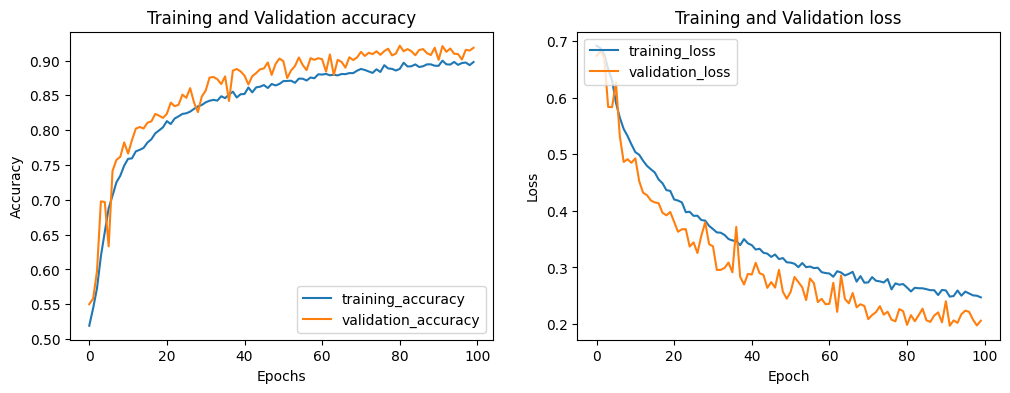

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(mod_7.history['accuracy'], label= 'training_accuracy')
plt.plot(mod_7.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(mod_7.history['loss'], label='training_loss')
plt.plot(mod_7.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation loss')

In [ ]:
model_7.evaluate(test_ds)

147/147 [==============================] - 15s 104ms/step - loss: 0.1947 - accuracy: 0.9261


[0.19474907219409943, 0.926099956035614]

In [ ]:
#MODELLO 8 32-63-128-256 W/ Drop + DATA AUGMENTATION 
model_8=Sequential()

model_8.add(Input((128,128,3)))
model_8.add(RandomFlip("horizontal"))
model_8.add(RandomRotation(0.2))

model_8.add(Conv2D(filters=32, kernel_size=(3,3)))
model_8.add(Activation(activation="relu"))
model_8.add(MaxPooling2D(pool_size=(2,2)))
model_8.add(Dropout(0.2))

model_8.add(Conv2D(filters=64, kernel_size=(3,3)))
model_8.add(Activation(activation="relu"))
model_8.add(MaxPooling2D(pool_size=(2,2))) 
model_8.add(Dropout(0.2))

model_8.add(Conv2D(filters=128, kernel_size=(3,3)))
model_8.add(Activation(activation="relu"))
model_8.add(MaxPooling2D(pool_size=(2,2))) 
model_8.add(Dropout(0.2))

model_8.add(Conv2D(filters=256, kernel_size=(3,3)))
model_8.add(Activation(activation="relu"))
model_8.add(MaxPooling2D(pool_size=(2,2))) 
model_8.add(Dropout(0.2))

model_8.add(Flatten())
model_8.add(Dense(64)) 
model_8.add(Activation("relu"))
model_8.add(Dropout(0.5))

model_8.add(Dense(1))
model_8.add(Activation("sigmoid"))

In [ ]:
model_8.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics= ["accuracy"])

model_8.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 128, 128, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 128, 128, 3)      0         
 tion)                                                           
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 activation (Activation)     (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)       

In [ ]:
mod_8 = model_8.fit(training_ds,epochs=100,validation_data = validation_ds)

Epoch 1/100
469/469 [==============================] - 84s 153ms/step - loss: 0.6888 - accuracy: 0.5285 - val_loss: 0.6361 - val_accuracy: 0.6435
Epoch 2/100
469/469 [==============================] - 83s 176ms/step - loss: 0.6362 - accuracy: 0.6335 - val_loss: 0.5818 - val_accuracy: 0.6929
Epoch 3/100
469/469 [==============================] - 73s 156ms/step - loss: 0.5930 - accuracy: 0.6839 - val_loss: 0.5522 - val_accuracy: 0.7111
Epoch 4/100
469/469 [==============================] - 64s 137ms/step - loss: 0.5818 - accuracy: 0.6905 - val_loss: 0.5789 - val_accuracy: 0.6929
Epoch 5/100
469/469 [==============================] - 73s 156ms/step - loss: 0.5562 - accuracy: 0.7157 - val_loss: 0.5181 - val_accuracy: 0.7453
Epoch 6/100
469/469 [==============================] - 64s 136ms/step - loss: 0.5282 - accuracy: 0.7370 - val_loss: 0.4474 - val_accuracy: 0.7824
Epoch 7/100
469/469 [==============================] - 64s 135ms/step - loss: 0.5057 - accuracy: 0.7549 - val_loss: 0.4840 -

Text(0.5, 1.0, 'Training and Validation loss')

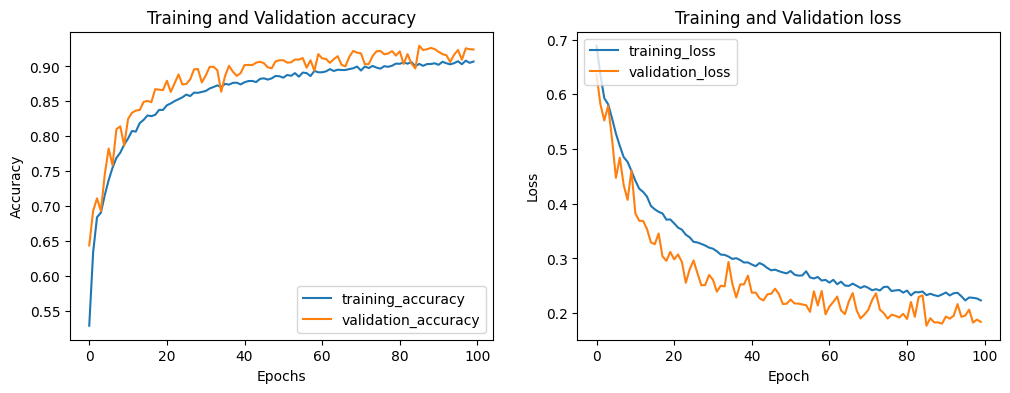

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(mod_8.history['accuracy'], label= 'training_accuracy')
plt.plot(mod_8.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(mod_8.history['loss'], label='training_loss')
plt.plot(mod_8.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation loss')

In [ ]:
model_8.evaluate(test_ds)

147/147 [==============================] - 15s 104ms/step - loss: 0.1701 - accuracy: 0.9329


[0.17010138928890228, 0.9329346418380737]